In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [18]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
df.duplicated().sum()     # no duplicate values

0

In [21]:
df['Exited'].value_counts()          # no of people leave the bank

Exited
0    7963
1    2037
Name: count, dtype: int64

In [22]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [26]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
# here two columns are in categorical mode we have to convert in to numerical
# one is 'Geography' and anthor is 'Gender'

df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True).astype(int)

In [32]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [35]:
# now we have to do some scalling on columns 
# because it will not converse if the columns value will be very large

X = df.drop(columns = 'Exited')
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [38]:
X_train.shape

(7000, 11)

In [41]:
# now we have to scale it

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [43]:
X_train_scaled[0]

array([-0.34459497, -0.65674999, -0.34217046,  1.58373369,  0.81966266,
        0.64598061,  0.97071435,  1.24821484, -0.57559072,  1.73073215,
       -1.09823226])

In [51]:
import tensorflow

In [47]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [50]:
model = Sequential()

model.add(Dense(3, activation = 'sigmoid', input_dim = 11))
model.add(Dense(1, activation = 'sigmoid'))

In [53]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [72]:
# now this is the compile stage 
# we will say  which loss function i will use , which optimizer i will use like this some information i have to say

model.compile(loss = 'binary_crossentropy' , optimizer = 'Adam', metrics = ['accuracy'])

In [82]:
history = model.fit(X_train_scaled, y_train, epochs = 30, validation_split = 0.2)

Epoch 1/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8231 - loss: 0.4196 - val_accuracy: 0.8271 - val_loss: 0.4134
Epoch 2/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8274 - loss: 0.4106 - val_accuracy: 0.8271 - val_loss: 0.4129
Epoch 3/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8245 - loss: 0.4175 - val_accuracy: 0.8257 - val_loss: 0.4125
Epoch 4/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8254 - loss: 0.4174 - val_accuracy: 0.8264 - val_loss: 0.4121
Epoch 5/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8179 - loss: 0.4219 - val_accuracy: 0.8257 - val_loss: 0.4120
Epoch 6/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8209 - loss: 0.4228 - val_accuracy: 0.8264 - val_loss: 0.4116
Epoch 7/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8264 - loss: 0.4131 - val_accuracy: 0.8271 - val_loss: 0.4111
Epoch 8/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8173 - loss: 0.4204 - val_accuracy: 0.

In [83]:
# now our model are trained and now we will see where our weights are stored 

model.layers[0].get_weights()          # here we have 33 weights and 3 bias for first hidden layer 

[array([[-0.1969919 ,  0.12678377,  0.09463558],
        [ 0.21469395, -3.7585242 ,  0.19025077],
        [-0.13915542,  0.02357769, -0.08794326],
        [ 0.86435574, -0.09870397, -0.47028837],
        [ 0.70601505, -0.12188942, -1.8620825 ],
        [-0.29752147, -0.01982712,  0.1111116 ],
        [-1.2875547 , -0.56500876, -1.2637491 ],
        [-0.02481544,  0.2611649 ,  0.22919187],
        [ 0.8731132 , -0.07657132,  0.68420935],
        [ 0.05276166, -0.15347235,  0.05588077],
        [-0.73126143,  0.29355472, -0.15674841]], dtype=float32),
 array([-0.9507707 ,  0.69855195, -1.6663535 ], dtype=float32)]

In [84]:
model.layers[1].get_weights()          # here we have 3 weights and 1 bias for for out put layer 

[array([[ 1.2566758],
        [-2.2445521],
        [ 1.574827 ]], dtype=float32),
 array([-1.1724722], dtype=float32)]

In [85]:
# now time for prediction

y_log = model.predict(X_test_scaled)           # the output value is not in form of 0 and 1 bcz we have used the sigmoid function so we have to convert it

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [86]:
y_pred = np.where(y_log > 0.5 , 1, 0)

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(y_pred, y_test)

0.8446666666666667

In [89]:
import matplotlib.pyplot as plt

In [90]:
history.history

{'accuracy': [0.8223214149475098,
  0.8235714435577393,
  0.824999988079071,
  0.8237500190734863,
  0.8226785659790039,
  0.8251785635948181,
  0.824999988079071,
  0.8244642615318298,
  0.8244642615318298,
  0.8255357146263123,
  0.8246428370475769,
  0.8251785635948181,
  0.8253571391105652,
  0.824999988079071,
  0.8246428370475769,
  0.8253571391105652,
  0.8257142901420593,
  0.8266071677207947,
  0.8266071677207947,
  0.8267857432365417,
  0.8266071677207947,
  0.8273214101791382,
  0.8283928632736206,
  0.8282142877578735,
  0.8278571367263794,
  0.8294642567634583,
  0.8303571343421936,
  0.8307142853736877,
  0.8308928608894348,
  0.831250011920929],
 'loss': [0.41935473680496216,
  0.418670654296875,
  0.41797930002212524,
  0.41737207770347595,
  0.4167744517326355,
  0.41625460982322693,
  0.41566818952560425,
  0.4151650071144104,
  0.41471418738365173,
  0.4141751527786255,
  0.4137122929096222,
  0.4132605493068695,
  0.41287288069725037,
  0.41237300634384155,
  0.4119

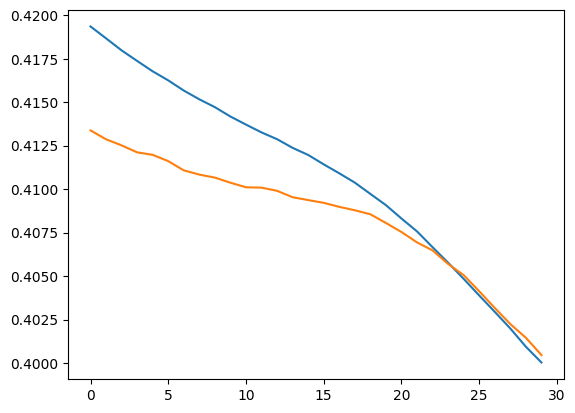

In [93]:
plt.plot(history.history['loss'])         # this is the training loss
plt.plot(history.history['val_loss'])         # this is the validation loss

# this is the overfitting condition

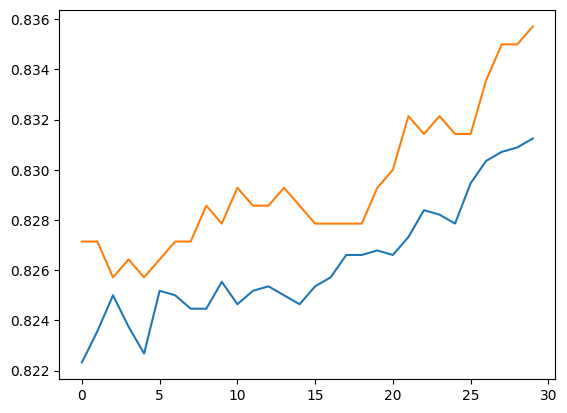

In [94]:
plt.plot(history.history['accuracy'])         
plt.plot(history.history['val_accuracy']) 